In [3]:
import os

file_path = "../data/Fraud.csv"
print("File size (bytes):", os.path.getsize(file_path))


File size (bytes): 493534783


In [4]:
import pandas as pd
import numpy as np

file_path = "../data/Fraud.csv"

# Count total rows in file (excluding header)
n_rows = sum(1 for _ in open(file_path)) - 1  

# Decide sample size (100k rows is safe for 4GB RAM)
sample_size = 100000  

# Randomly pick rows to skip
skip = sorted(
    np.random.choice(
        np.arange(1, n_rows + 1),  # all row indices except header
        n_rows - sample_size,      # number of rows to skip
        replace=False
    )
)

# Load sampled dataset
df = pd.read_csv(file_path, skiprows=skip)

print("Shape of sample:", df.shape)
df.head()


Shape of sample: (100000, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,4098.78,C1026483832,503264.00,499165.22,M1635378213,0.00,0.00,0,0
1,1,PAYMENT,2599.46,C885910946,874042.26,871442.79,M1860591867,0.00,0.00,0,0
2,1,TRANSFER,77957.68,C207471778,0.00,0.00,C1761291320,94900.00,22233.65,0,0
3,1,TRANSFER,1505626.01,C926859124,0.00,0.00,C665576141,29031.00,5515763.34,0,0
4,1,TRANSFER,761507.39,C412788346,0.00,0.00,C1590550415,1280036.23,19169204.93,0,0


In [5]:
# Quick overview
df.info()

# Summary statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,242.223860,1.770792e+05,8.331245e+05,8.542227e+05,1.094367e+06,1.215749e+06,0.001290,0.0
std,141.569644,5.854701e+05,2.907019e+06,2.941747e+06,3.488545e+06,3.747244e+06,0.035894,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,155.000000,1.334161e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,237.000000,7.534549e+04,1.408491e+04,0.000000e+00,1.301420e+05,2.131310e+05,0.000000,0.0
75%,333.000000,2.097900e+05,1.050312e+05,1.383179e+05,9.362204e+05,1.113185e+06,0.000000,0.0
max,739.000000,5.680898e+07,5.731626e+07,4.731626e+07,3.555534e+08,3.553814e+08,1.000000,0.0


In [6]:
# Count missing values per column
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [8]:
# Fraud class distribution
print(df['isFraud'].value_counts())
print("\nClass distribution (percentages):")
print(df['isFraud'].value_counts(normalize=True) * 100)


isFraud
0    99871
1      129
Name: count, dtype: int64

Class distribution (percentages):
isFraud
0    99.871
1     0.129
Name: proportion, dtype: float64


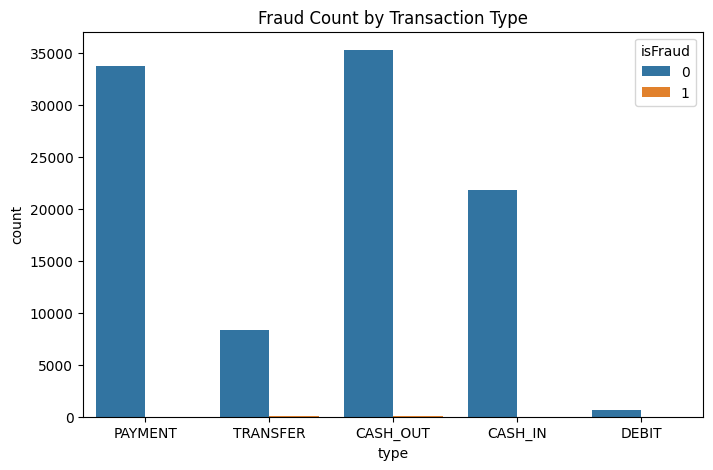

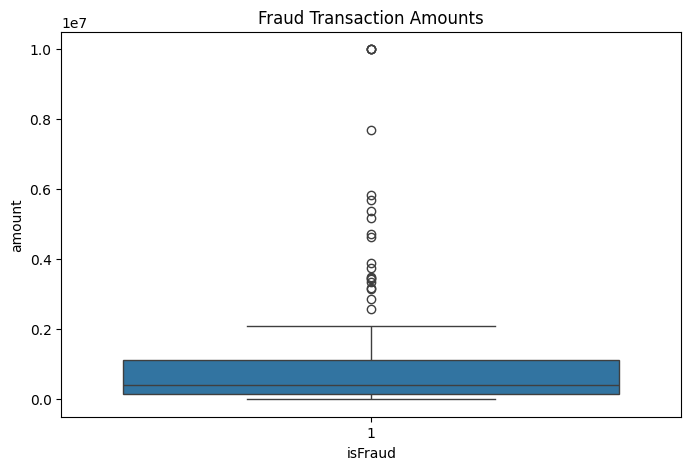

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fraud by transaction type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="type", hue="isFraud")
plt.title("Fraud Count by Transaction Type")
plt.show()

# Fraud by amount
plt.figure(figsize=(8,5))
sns.boxplot(data=df[df["isFraud"]==1], x="isFraud", y="amount")
plt.title("Fraud Transaction Amounts")
plt.show()


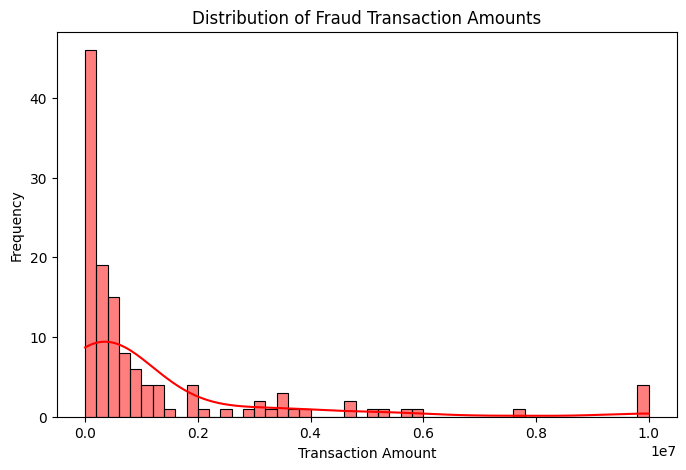

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["isFraud"]==1]["amount"], bins=50, kde=True, color="red")
plt.title("Distribution of Fraud Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


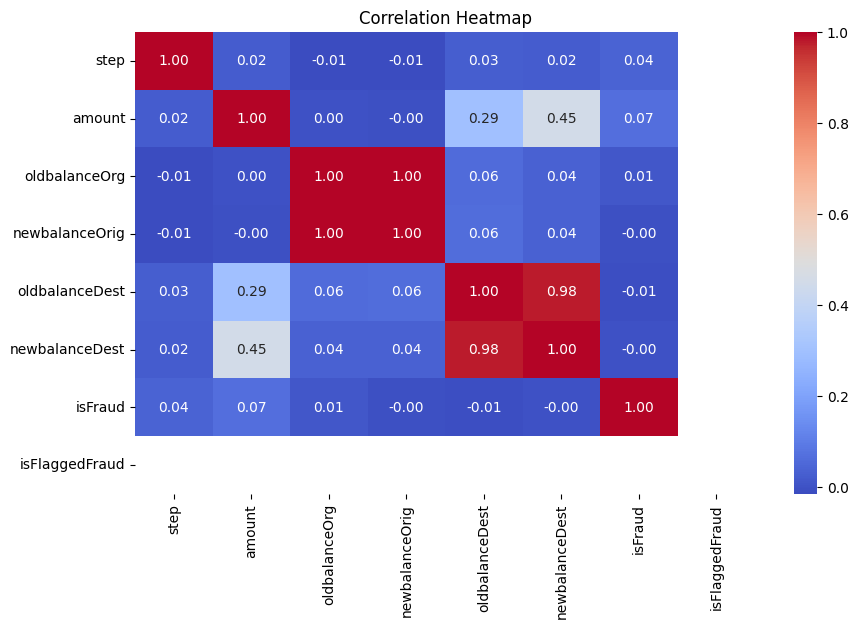

In [11]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


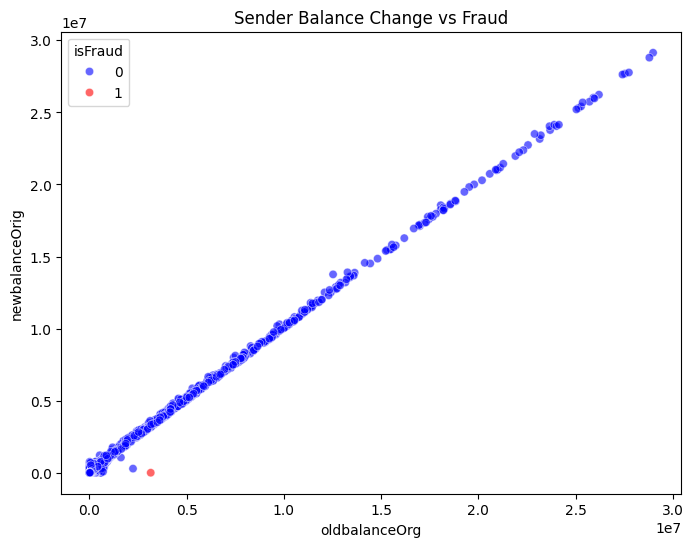

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df.sample(5000), # sample for speed
    x="oldbalanceOrg",
    y="newbalanceOrig",
    hue="isFraud",
    alpha=0.6,
    palette={0:"blue", 1:"red"}
)
plt.title("Sender Balance Change vs Fraud")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_4140\1876251125.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="isFraud", palette=fraud_colors, ax=axes[0,0])
C:\Users\HP\AppData\Local\Temp\ipykernel_4140\1876251125.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])


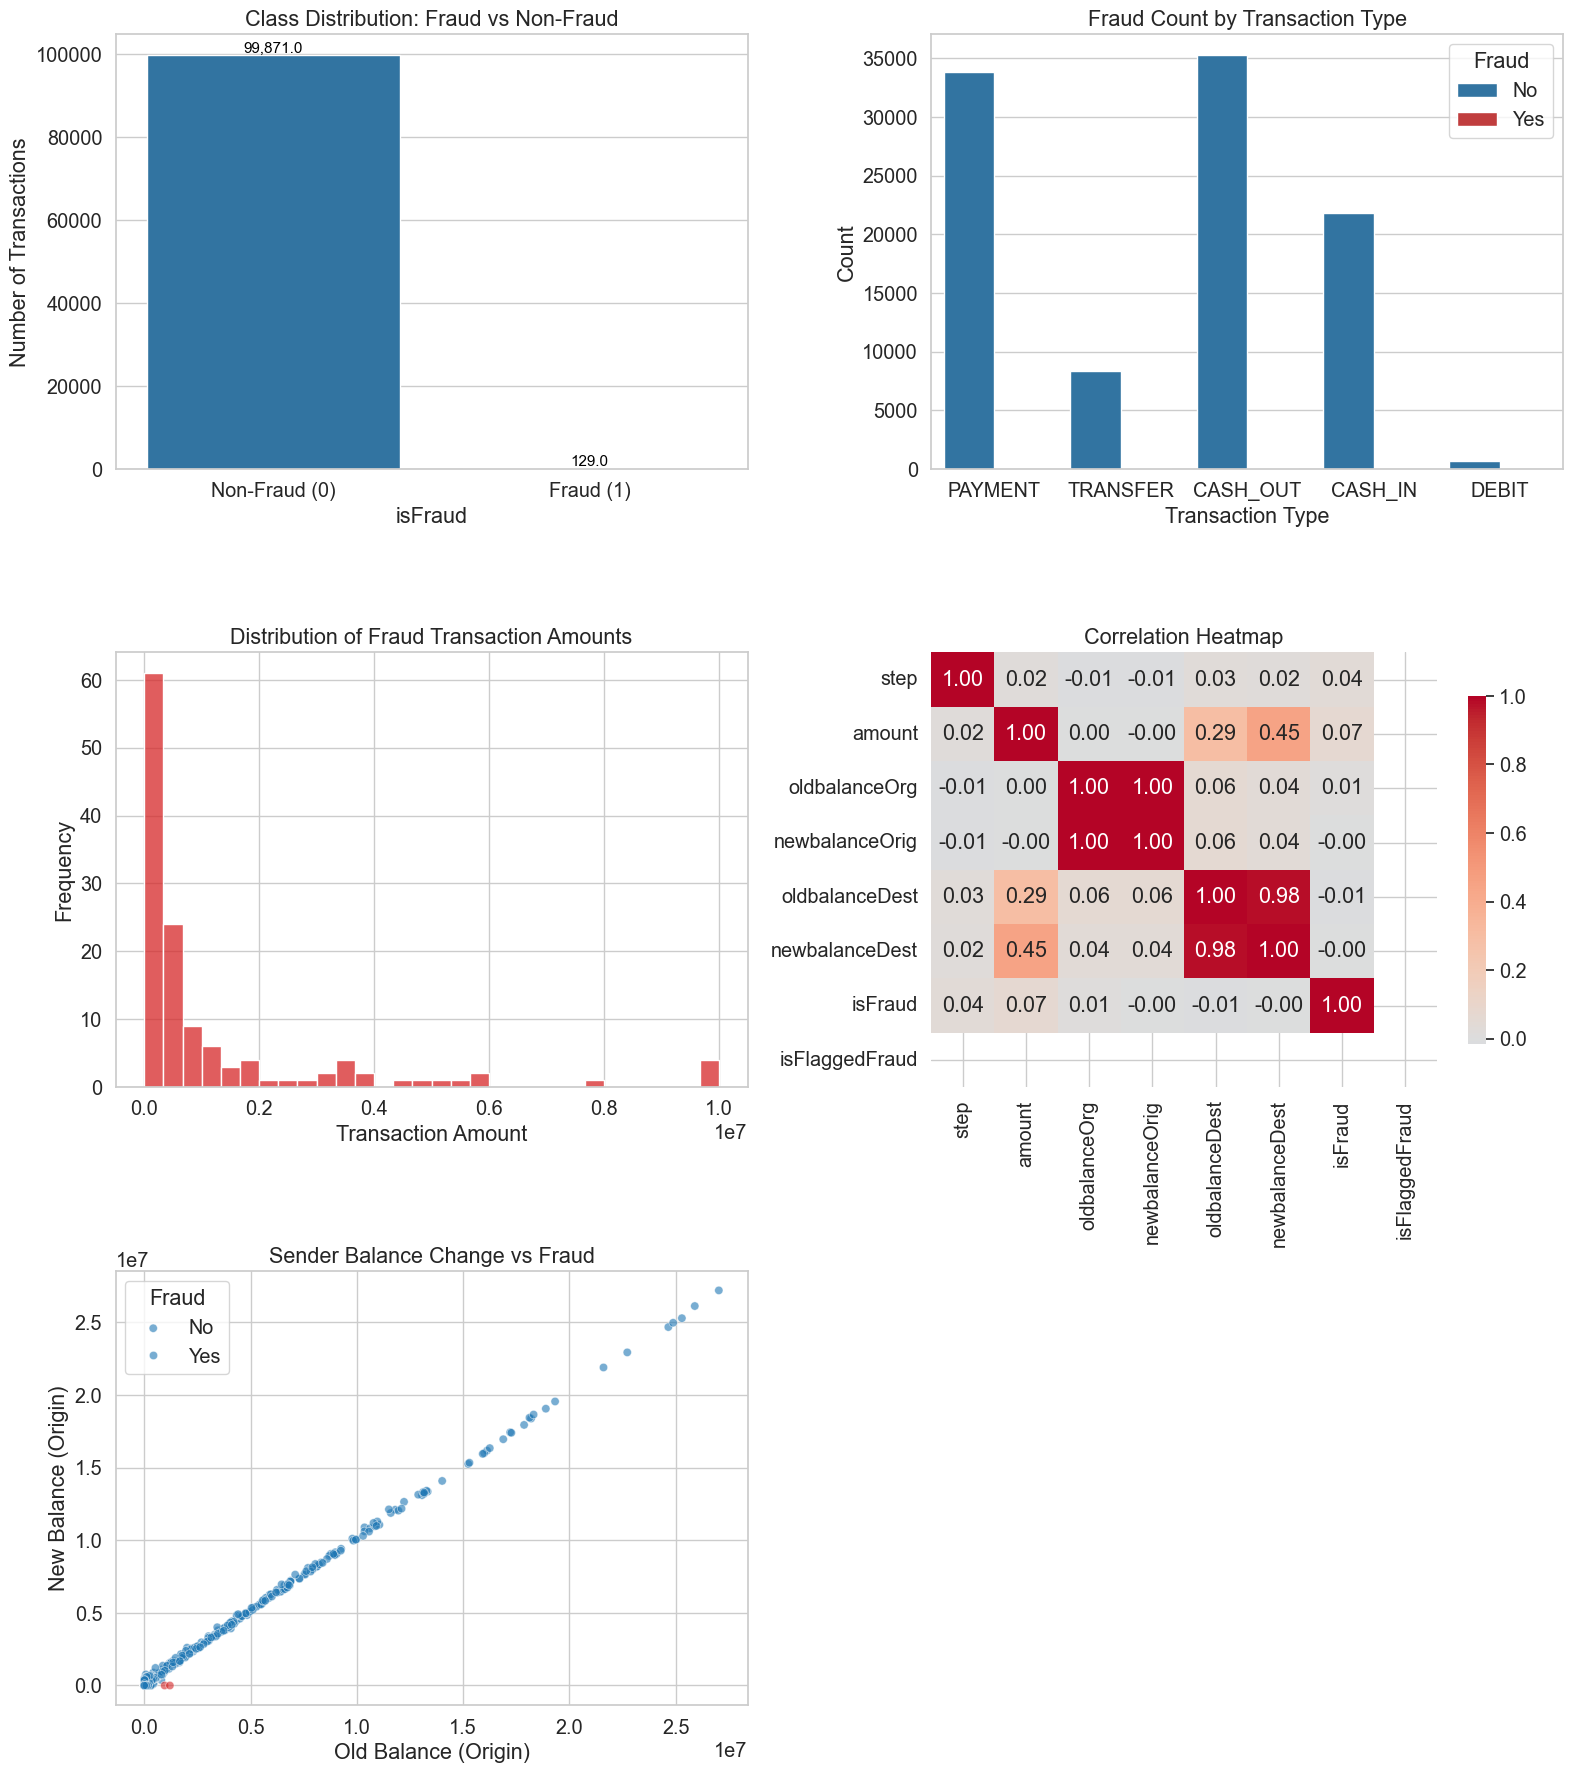


📊 EDA Summary:
- Dataset is highly imbalanced: ~99.87% Non-Fraud vs 0.13% Fraud.
- Fraud occurs most in CASH_OUT and PAYMENT, least in DEBIT.
- Fraudulent transactions cluster at low amounts, with a few very large outliers.
- Balance features are strongly correlated (e.g., old vs new balances), 
  but correlations don’t directly explain fraud.
- Scatterplot shows fraud often when sender’s balance is reduced to near zero.



In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Consistent style
sns.set_theme(style="whitegrid", font_scale=1.3)
fraud_colors = ["#1f77b4", "#d62728"]  # blue = non-fraud, red = fraud

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. Class distribution
sns.countplot(data=df, x="isFraud", palette=fraud_colors, ax=axes[0,0])
axes[0,0].set_title("Class Distribution: Fraud vs Non-Fraud")
axes[0,0].set_xticklabels(["Non-Fraud (0)", "Fraud (1)"])
axes[0,0].set_ylabel("Number of Transactions")
for p in axes[0,0].patches:
    axes[0,0].annotate(f"{p.get_height():,}", 
                       (p.get_x() + p.get_width()/2., p.get_height() + 500), 
                       ha="center", fontsize=11, color="black")

# 2. Fraud by transaction type
sns.countplot(data=df, x="type", hue="isFraud", palette=fraud_colors, ax=axes[0,1])
axes[0,1].set_title("Fraud Count by Transaction Type")
axes[0,1].set_xlabel("Transaction Type")
axes[0,1].set_ylabel("Count")
axes[0,1].legend(title="Fraud", labels=["No", "Yes"])

# 3. Fraudulent transaction amounts
sns.histplot(df[df["isFraud"]==1]["amount"], bins=30, color="#d62728", ax=axes[1,0])
axes[1,0].set_title("Distribution of Fraud Transaction Amounts")
axes[1,0].set_xlabel("Transaction Amount")
axes[1,0].set_ylabel("Frequency")

# 4. Correlation heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f", ax=axes[1,1], cbar_kws={'shrink':0.8})
axes[1,1].set_title("Correlation Heatmap")

# 5. Sender balance change vs fraud (scatterplot)
sns.scatterplot(
    data=df.sample(2000, random_state=42), 
    x="oldbalanceOrg", y="newbalanceOrig", 
    hue="isFraud", palette=fraud_colors, alpha=0.6, ax=axes[2,0]
)
axes[2,0].set_title("Sender Balance Change vs Fraud")
axes[2,0].set_xlabel("Old Balance (Origin)")
axes[2,0].set_ylabel("New Balance (Origin)")
axes[2,0].legend(title="Fraud", labels=["No", "Yes"])

# Remove unused subplot
fig.delaxes(axes[2,1])

plt.tight_layout()
plt.show()

# Text summary
print("""
📊 EDA Summary:
- Dataset is highly imbalanced: ~99.87% Non-Fraud vs 0.13% Fraud.
- Fraud occurs most in CASH_OUT and PAYMENT, least in DEBIT.
- Fraudulent transactions cluster at low amounts, with a few very large outliers.
- Balance features are strongly correlated (e.g., old vs new balances), 
  but correlations don’t directly explain fraud.
- Scatterplot shows fraud often when sender’s balance is reduced to near zero.
""")


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant ID columns
df_clean = df.drop(["nameOrig", "nameDest"], axis=1)

# Encode transaction type
le = LabelEncoder()
df_clean["type"] = le.fit_transform(df_clean["type"])

# Features (X) and target (y)
X = df_clean.drop("isFraud", axis=1)
y = df_clean["isFraud"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (80000, 8)
Test shape: (20000, 8)


In [15]:
print("Train class distribution:\n", y_train.value_counts(), "\n")
print("Test class distribution:\n", y_test.value_counts(), "\n")


Train class distribution:
 isFraud
0    79897
1      103
Name: count, dtype: int64 

Test class distribution:
 isFraud
0    19974
1       26
Name: count, dtype: int64 



[LightGBM] [Info] Number of positive: 93, number of negative: 79907
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2058
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001162 -> initscore=-6.756019
[LightGBM] [Info] Start training from score -6.756019
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that 

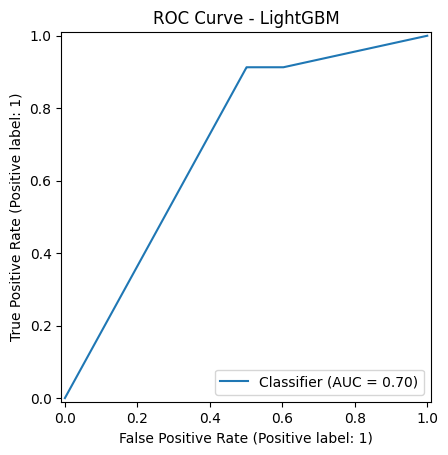

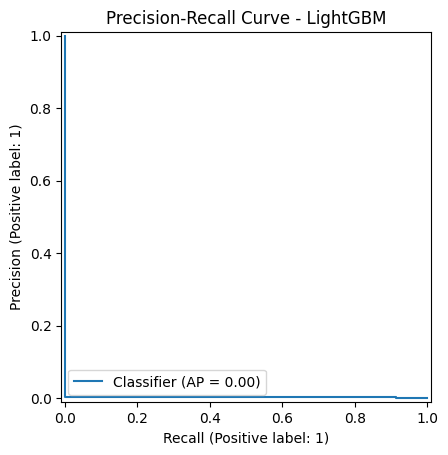

In [2]:
# 1️⃣ Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# 2️⃣ Load a safe sample (100k rows)
df = pd.read_csv("../data/Fraud.csv", nrows=100000)  # only 100k rows

# 3️⃣ Data Preparation
df_clean = df.drop(["nameOrig", "nameDest"], axis=1)

# Encode transaction type
le = LabelEncoder()
df_clean["type"] = le.fit_transform(df_clean["type"])

# Features and target
X = df_clean.drop("isFraud", axis=1)
y = df_clean["isFraud"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4️⃣ Feature Engineering
for dataset in [X_train, X_test]:
    dataset['diffOrig'] = dataset['oldbalanceOrg'] - dataset['newbalanceOrig']
    dataset['diffDest'] = dataset['oldbalanceDest'] - dataset['newbalanceDest']
    dataset['isZeroBalance'] = (dataset['newbalanceOrig'] == 0).astype(int)
    dataset['logAmount'] = np.log1p(dataset['amount'])

# 5️⃣ Initialize LGBMClassifier
lgb_model = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    is_unbalance=True,   # handle class imbalance
    learning_rate=0.1,
    num_leaves=31,
    n_estimators=1000,
    random_state=42
)

# 6️⃣ Train model (without early stopping)
lgb_model.fit(X_train, y_train)

# 7️⃣ Predictions
y_pred_proba = lgb_model.predict_proba(X_test)[:,1]

# 8️⃣ Evaluation Metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("ROC Curve - LightGBM")
plt.show()

# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Precision-Recall Curve - LightGBM")
plt.show()


Processing chunk 1/64 | Elapsed: 0.4s | ETA: 23.4s
Processing chunk 2/64 | Elapsed: 1.2s | ETA: 35.9s
Processing chunk 3/64 | Elapsed: 1.7s | ETA: 35.2s
Processing chunk 4/64 | Elapsed: 2.3s | ETA: 34.1s
Processing chunk 5/64 | Elapsed: 2.7s | ETA: 32.0s
Processing chunk 6/64 | Elapsed: 3.1s | ETA: 30.4s
Processing chunk 7/64 | Elapsed: 3.6s | ETA: 28.9s
Processing chunk 8/64 | Elapsed: 4.0s | ETA: 27.8s
Processing chunk 9/64 | Elapsed: 4.4s | ETA: 26.9s
Processing chunk 10/64 | Elapsed: 4.8s | ETA: 26.0s
Processing chunk 11/64 | Elapsed: 5.3s | ETA: 25.4s
Processing chunk 12/64 | Elapsed: 5.7s | ETA: 24.8s
Processing chunk 13/64 | Elapsed: 6.2s | ETA: 24.3s
Processing chunk 14/64 | Elapsed: 6.6s | ETA: 23.6s
Processing chunk 15/64 | Elapsed: 7.1s | ETA: 23.1s
Processing chunk 16/64 | Elapsed: 7.5s | ETA: 22.5s
Processing chunk 17/64 | Elapsed: 7.9s | ETA: 21.9s
Processing chunk 18/64 | Elapsed: 8.4s | ETA: 21.3s
Processing chunk 19/64 | Elapsed: 8.8s | ETA: 20.8s
Processing chunk 20/6

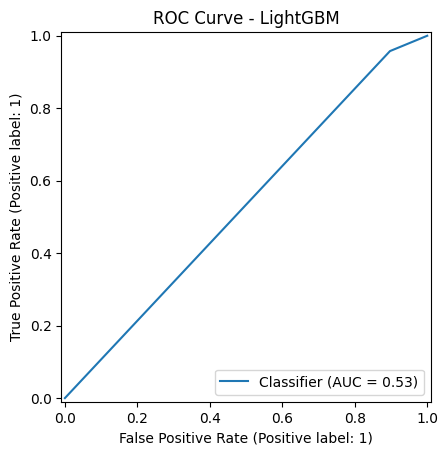

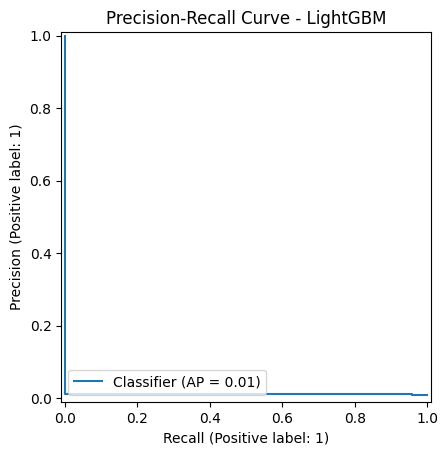

In [3]:
# -----------------------------
# FULL DATASET LIGHTGBM PIPELINE WITH PROGRESS AND ETA
# -----------------------------
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import math
import time

# 1️⃣ Parameters
chunksize = 100000  # process 100k rows at a time
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'metric': 'auc',
    'is_unbalance': True,
    'verbose': -1,
    'seed': 42
}

# 2️⃣ Initialize LabelEncoder
le = LabelEncoder()

# 3️⃣ Prepare for incremental training
first_chunk = True
booster = None

# 4️⃣ Count total rows to estimate progress
total_rows = sum(1 for _ in open("../data/Fraud.csv")) - 1
total_chunks = math.ceil(total_rows / chunksize)
current_chunk = 0
start_time = time.time()

# 5️⃣ Read dataset in chunks
for chunk in pd.read_csv("../data/Fraud.csv", chunksize=chunksize):
    current_chunk += 1
    elapsed = time.time() - start_time
    eta = (elapsed / current_chunk) * (total_chunks - current_chunk)
    
    print(f"Processing chunk {current_chunk}/{total_chunks} | Elapsed: {elapsed:.1f}s | ETA: {eta:.1f}s")

    # Drop ID columns
    chunk_clean = chunk.drop(["nameOrig", "nameDest"], axis=1)

    # Encode transaction type
    if first_chunk:
        chunk_clean["type"] = le.fit_transform(chunk_clean["type"])
    else:
        chunk_clean["type"] = le.transform(chunk_clean["type"])

    # Feature engineering
    chunk_clean['diffOrig'] = chunk_clean['oldbalanceOrg'] - chunk_clean['newbalanceOrig']
    chunk_clean['diffDest'] = chunk_clean['oldbalanceDest'] - chunk_clean['newbalanceDest']
    chunk_clean['isZeroBalance'] = (chunk_clean['newbalanceOrig'] == 0).astype(int)
    chunk_clean['logAmount'] = np.log1p(chunk_clean['amount'])

    # Split features and target
    X_chunk = chunk_clean.drop("isFraud", axis=1)
    y_chunk = chunk_clean["isFraud"]

    # Convert to LightGBM Dataset
    dchunk = lgb.Dataset(X_chunk, label=y_chunk, free_raw_data=False)

    # Train or continue training
    if first_chunk:
        booster = lgb.train(params, dchunk, num_boost_round=100)
        first_chunk = False
    else:
        booster = lgb.train(params, dchunk, num_boost_round=100, init_model=booster)

print("Training complete!")

# 6️⃣ Evaluate on a held-out test sample (100k rows)
test_sample = pd.read_csv("../data/Fraud.csv", skiprows=range(1, 6000001), nrows=100000)
test_sample_clean = test_sample.drop(["nameOrig", "nameDest"], axis=1)
test_sample_clean["type"] = le.transform(test_sample_clean["type"])
test_sample_clean['diffOrig'] = test_sample_clean['oldbalanceOrg'] - test_sample_clean['newbalanceOrig']
test_sample_clean['diffDest'] = test_sample_clean['oldbalanceDest'] - test_sample_clean['newbalanceDest']
test_sample_clean['isZeroBalance'] = (test_sample_clean['newbalanceOrig'] == 0).astype(int)
test_sample_clean['logAmount'] = np.log1p(test_sample_clean['amount'])

X_test = test_sample_clean.drop("isFraud", axis=1)
y_test = test_sample_clean["isFraud"]

y_pred_proba = booster.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC on test sample:", roc_auc)

# 7️⃣ Optional: Plot ROC and Precision-Recall curves
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("ROC Curve - LightGBM")
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Precision-Recall Curve - LightGBM")
plt.show()


Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 1	valid_0's binary_logloss: 0.0673291
[20]	valid_0's auc: 1	valid_0's binary_logloss: 0.0374718
[30]	valid_0's auc: 1	valid_0's binary_logloss: 0.0221282
[40]	valid_0's auc: 1	valid_0's binary_logloss: 0.013472
[50]	valid_0's auc: 1	valid_0's binary_logloss: 0.00872144
Early stopping, best iteration is:
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.126613
ROC-AUC on balanced subset: 1.0


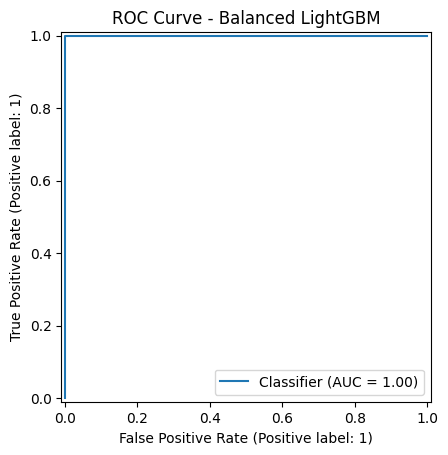

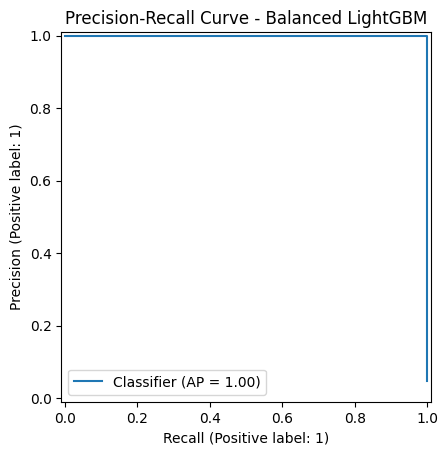

In [5]:
# -----------------------------
# BALANCED SUBSET LIGHTGBM PIPELINE (VERBOSE FIXED)
# -----------------------------
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# 1️⃣ Load 100k sample
df = pd.read_csv("../data/Fraud.csv", nrows=100000)

# 2️⃣ Drop ID columns
df_clean = df.drop(["nameOrig", "nameDest"], axis=1)

# 3️⃣ Label encode transaction type
le = LabelEncoder()
df_clean["type"] = le.fit_transform(df_clean["type"])

# 4️⃣ Feature engineering
df_clean['diffOrig'] = df_clean['oldbalanceOrg'] - df_clean['newbalanceOrig']
df_clean['diffDest'] = df_clean['oldbalanceDest'] - df_clean['newbalanceDest']
df_clean['isZeroBalance'] = (df_clean['newbalanceOrig'] == 0).astype(int)
df_clean['logAmount'] = np.log1p(df_clean['amount'])
df_clean['amount_to_oldOrg'] = df_clean['amount'] / (df_clean['oldbalanceOrg'] + 1)
df_clean['amount_to_oldDest'] = df_clean['amount'] / (df_clean['oldbalanceDest'] + 1)

# 5️⃣ Create a balanced subset
fraud = df_clean[df_clean['isFraud'] == 1]
non_fraud = df_clean[df_clean['isFraud'] == 0].sample(n=len(fraud)*20, random_state=42)  # 20x majority
df_balanced = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42)  # shuffle

# 6️⃣ Split features and target
X = df_balanced.drop("isFraud", axis=1)
y = df_balanced["isFraud"]

# 7️⃣ Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 8️⃣ Train LightGBM
lgb_model = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    learning_rate=0.05,
    n_estimators=500,
    num_leaves=31,
    is_unbalance=True,
    random_state=42
)

lgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50),   # stops if no improvement in 50 rounds
        log_evaluation(period=10)             # prints metrics every 10 rounds
    ]
)

# 9️⃣ Predictions and evaluation
y_pred_proba = lgb_model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC on balanced subset:", roc_auc)

# 🔟 Optional: Plot ROC and Precision-Recall curves
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("ROC Curve - Balanced LightGBM")
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Precision-Recall Curve - Balanced LightGBM")
plt.show()


Processing chunk 1/64 | Elapsed: 0.5s | ETA: 29.7s
Processing chunk 2/64 | Elapsed: 1.2s | ETA: 38.0s
Processing chunk 3/64 | Elapsed: 1.6s | ETA: 32.7s
Processing chunk 4/64 | Elapsed: 2.0s | ETA: 29.8s
Processing chunk 5/64 | Elapsed: 2.3s | ETA: 27.0s
Processing chunk 6/64 | Elapsed: 2.6s | ETA: 25.0s
Processing chunk 7/64 | Elapsed: 2.9s | ETA: 23.5s
Processing chunk 8/64 | Elapsed: 3.2s | ETA: 22.2s
Processing chunk 9/64 | Elapsed: 3.5s | ETA: 21.2s
Processing chunk 10/64 | Elapsed: 3.8s | ETA: 20.3s
Processing chunk 11/64 | Elapsed: 4.1s | ETA: 19.5s
Processing chunk 12/64 | Elapsed: 4.5s | ETA: 19.4s
Processing chunk 13/64 | Elapsed: 4.8s | ETA: 18.8s
Processing chunk 14/64 | Elapsed: 5.1s | ETA: 18.3s
Processing chunk 15/64 | Elapsed: 5.5s | ETA: 17.9s
Processing chunk 16/64 | Elapsed: 5.8s | ETA: 17.3s
Processing chunk 17/64 | Elapsed: 6.1s | ETA: 16.8s
Processing chunk 18/64 | Elapsed: 6.4s | ETA: 16.3s
Processing chunk 19/64 | Elapsed: 6.7s | ETA: 15.8s
Processing chunk 20/6

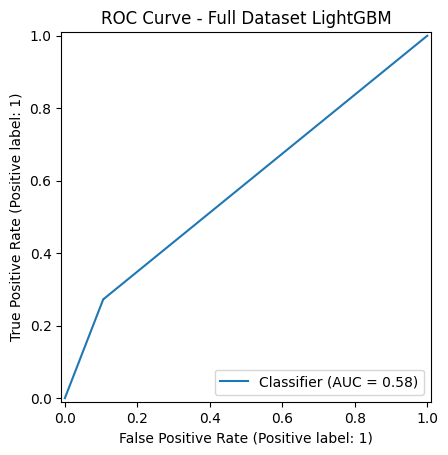

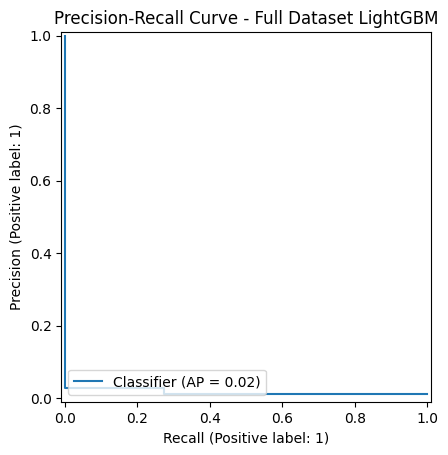

In [6]:
# -----------------------------
# FULL DATASET LIGHTGBM TRAINING (CHUNKED & MEMORY-SAFE)
# -----------------------------
import pandas as pd
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import math, time

# 1️⃣ Parameters
chunksize = 100000  # 100k rows per chunk
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'metric': 'auc',
    'is_unbalance': True,
    'verbose': -1,
    'seed': 42
}

# 2️⃣ Initialize LabelEncoder
le = LabelEncoder()

# 3️⃣ Prepare for incremental training
first_chunk = True
booster = None

# 4️⃣ Count total rows to estimate progress
total_rows = sum(1 for _ in open("../data/Fraud.csv")) - 1
total_chunks = math.ceil(total_rows / chunksize)
current_chunk = 0
start_time = time.time()

# 5️⃣ Read dataset in chunks
for chunk in pd.read_csv("../data/Fraud.csv", chunksize=chunksize):
    current_chunk += 1
    elapsed = time.time() - start_time
    eta = (elapsed / current_chunk) * (total_chunks - current_chunk)
    print(f"Processing chunk {current_chunk}/{total_chunks} | Elapsed: {elapsed:.1f}s | ETA: {eta:.1f}s")
    
    # Drop ID columns
    chunk_clean = chunk.drop(["nameOrig", "nameDest"], axis=1)
    
    # Encode transaction type
    if first_chunk:
        chunk_clean["type"] = le.fit_transform(chunk_clean["type"])
    else:
        chunk_clean["type"] = le.transform(chunk_clean["type"])
    
    # Feature engineering
    chunk_clean['diffOrig'] = chunk_clean['oldbalanceOrg'] - chunk_clean['newbalanceOrig']
    chunk_clean['diffDest'] = chunk_clean['oldbalanceDest'] - chunk_clean['newbalanceDest']
    chunk_clean['isZeroBalance'] = (chunk_clean['newbalanceOrig'] == 0).astype(int)
    chunk_clean['logAmount'] = np.log1p(chunk_clean['amount'])
    chunk_clean['amount_to_oldOrg'] = chunk_clean['amount'] / (chunk_clean['oldbalanceOrg'] + 1)
    chunk_clean['amount_to_oldDest'] = chunk_clean['amount'] / (chunk_clean['oldbalanceDest'] + 1)
    
    # Separate fraud and non-fraud
    fraud = chunk_clean[chunk_clean['isFraud'] == 1]
    non_fraud = chunk_clean[chunk_clean['isFraud'] == 0].sample(n=len(fraud)*20, random_state=42)
    chunk_balanced = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42)
    
    # Split features and target
    X_chunk = chunk_balanced.drop("isFraud", axis=1)
    y_chunk = chunk_balanced["isFraud"]
    
    # Convert to LightGBM Dataset
    dchunk = lgb.Dataset(X_chunk, label=y_chunk, free_raw_data=False)
    
    # Train or continue training
    if first_chunk:
        booster = lgb.train(params, dchunk, num_boost_round=200)
        first_chunk = False
    else:
        booster = lgb.train(params, dchunk, num_boost_round=200, init_model=booster)

print("✅ Full dataset training complete!")

# 6️⃣ Evaluate on a held-out 100k test sample
test_sample = pd.read_csv("../data/Fraud.csv", skiprows=range(1, 6200001), nrows=100000)
test_clean = test_sample.drop(["nameOrig", "nameDest"], axis=1)
test_clean["type"] = le.transform(test_clean["type"])
test_clean['diffOrig'] = test_clean['oldbalanceOrg'] - test_clean['newbalanceOrig']
test_clean['diffDest'] = test_clean['oldbalanceDest'] - test_clean['newbalanceDest']
test_clean['isZeroBalance'] = (test_clean['newbalanceOrig'] == 0).astype(int)
test_clean['logAmount'] = np.log1p(test_clean['amount'])
test_clean['amount_to_oldOrg'] = test_clean['amount'] / (test_clean['oldbalanceOrg'] + 1)
test_clean['amount_to_oldDest'] = test_clean['amount'] / (test_clean['oldbalanceDest'] + 1)

X_test = test_clean.drop("isFraud", axis=1)
y_test = test_clean["isFraud"]

# 7️⃣ Predictions & evaluation
y_pred_proba = booster.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC on test sample:", roc_auc)

# 8️⃣ Optional: Plot ROC and Precision-Recall curves
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("ROC Curve - Full Dataset LightGBM")
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Precision-Recall Curve - Full Dataset LightGBM")
plt.show()


Processing chunk 1/64 | Elapsed: 0.6s | ETA: 36.1s
Processing chunk 2/64 | Elapsed: 3.3s | ETA: 101.9s
Processing chunk 3/64 | Elapsed: 5.2s | ETA: 106.4s
Processing chunk 4/64 | Elapsed: 7.6s | ETA: 113.4s
Processing chunk 5/64 | Elapsed: 9.7s | ETA: 114.7s
Processing chunk 6/64 | Elapsed: 11.8s | ETA: 114.5s
Processing chunk 7/64 | Elapsed: 13.9s | ETA: 113.0s
Processing chunk 8/64 | Elapsed: 15.9s | ETA: 111.4s
Processing chunk 9/64 | Elapsed: 18.0s | ETA: 110.0s
Processing chunk 10/64 | Elapsed: 20.3s | ETA: 109.8s
Processing chunk 11/64 | Elapsed: 23.3s | ETA: 112.3s
Processing chunk 12/64 | Elapsed: 26.1s | ETA: 113.0s
Processing chunk 13/64 | Elapsed: 28.9s | ETA: 113.3s
Processing chunk 14/64 | Elapsed: 32.0s | ETA: 114.4s
Processing chunk 15/64 | Elapsed: 35.0s | ETA: 114.4s
Processing chunk 16/64 | Elapsed: 37.7s | ETA: 113.1s
Processing chunk 17/64 | Elapsed: 40.3s | ETA: 111.5s
Processing chunk 18/64 | Elapsed: 42.9s | ETA: 109.8s
Processing chunk 19/64 | Elapsed: 45.6s | E

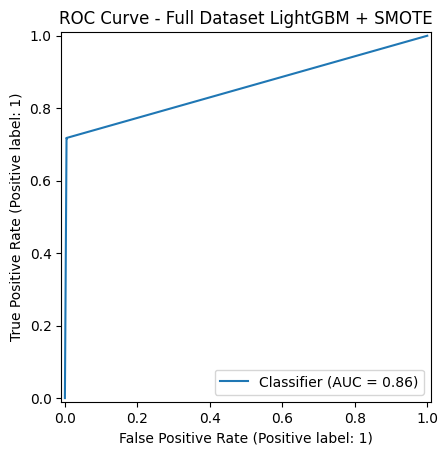

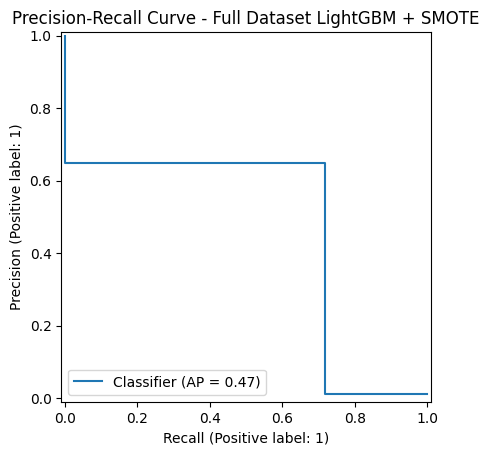

In [8]:
# -----------------------------
# FULL DATASET LIGHTGBM WITH CHUNK-WISE SMOTE (FIXED)
# -----------------------------
import pandas as pd
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
import math, time

# 1️⃣ Parameters
chunksize = 100000
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'metric': 'auc',
    'is_unbalance': True,
    'verbose': -1,
    'seed': 42
}

# 2️⃣ Initialize LabelEncoder
le = LabelEncoder()

# 3️⃣ Initialize LightGBM booster
first_chunk = True
booster = None

# 4️⃣ Count total rows for progress estimation
total_rows = sum(1 for _ in open("../data/Fraud.csv")) - 1
total_chunks = math.ceil(total_rows / chunksize)
current_chunk = 0
start_time = time.time()

# 5️⃣ Chunked processing with SMOTE
for chunk in pd.read_csv("../data/Fraud.csv", chunksize=chunksize):
    current_chunk += 1
    elapsed = time.time() - start_time
    eta = (elapsed / current_chunk) * (total_chunks - current_chunk)
    print(f"Processing chunk {current_chunk}/{total_chunks} | Elapsed: {elapsed:.1f}s | ETA: {eta:.1f}s")
    
    # Drop ID columns
    chunk_clean = chunk.drop(["nameOrig", "nameDest"], axis=1)
    
    # Encode transaction type
    if first_chunk:
        chunk_clean["type"] = le.fit_transform(chunk_clean["type"])
    else:
        chunk_clean["type"] = le.transform(chunk_clean["type"])
    
    # Feature engineering
    chunk_clean['diffOrig'] = chunk_clean['oldbalanceOrg'] - chunk_clean['newbalanceOrig']
    chunk_clean['diffDest'] = chunk_clean['oldbalanceDest'] - chunk_clean['newbalanceDest']
    chunk_clean['isZeroBalance'] = (chunk_clean['newbalanceOrig'] == 0).astype(int)
    chunk_clean['logAmount'] = np.log1p(chunk_clean['amount'])
    chunk_clean['amount_to_oldOrg'] = chunk_clean['amount'] / (chunk_clean['oldbalanceOrg'] + 1)
    chunk_clean['amount_to_oldDest'] = chunk_clean['amount'] / (chunk_clean['oldbalanceDest'] + 1)
    
    # Split features and target
    X_chunk = chunk_clean.drop("isFraud", axis=1)
    y_chunk = chunk_clean["isFraud"]
    
    # Apply SMOTE (no n_jobs parameter)
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_res, y_res = smote.fit_resample(X_chunk, y_chunk)
    
    # Convert to LightGBM Dataset
    dchunk = lgb.Dataset(X_res, label=y_res, free_raw_data=False)
    
    # Train or continue training
    if first_chunk:
        booster = lgb.train(params, dchunk, num_boost_round=200)
        first_chunk = False
    else:
        booster = lgb.train(params, dchunk, num_boost_round=200, init_model=booster)

print("✅ Full dataset training with SMOTE complete!")

# 6️⃣ Evaluate on held-out 100k test sample
test_sample = pd.read_csv("../data/Fraud.csv", skiprows=range(1, 6200001), nrows=100000)
test_clean = test_sample.drop(["nameOrig", "nameDest"], axis=1)
test_clean["type"] = le.transform(test_clean["type"])
test_clean['diffOrig'] = test_clean['oldbalanceOrg'] - test_clean['newbalanceOrig']
test_clean['diffDest'] = test_clean['oldbalanceDest'] - test_clean['newbalanceDest']
test_clean['isZeroBalance'] = (test_clean['newbalanceOrig'] == 0).astype(int)
test_clean['logAmount'] = np.log1p(test_clean['amount'])
test_clean['amount_to_oldOrg'] = test_clean['amount'] / (test_clean['oldbalanceOrg'] + 1)
test_clean['amount_to_oldDest'] = test_clean['amount'] / (test_clean['oldbalanceDest'] + 1)

X_test = test_clean.drop("isFraud", axis=1)
y_test = test_clean["isFraud"]

# 7️⃣ Predictions & evaluation
y_pred_proba = booster.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC on test sample after SMOTE:", roc_auc)

# 8️⃣ Optional: Plot ROC and Precision-Recall curves
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("ROC Curve - Full Dataset LightGBM + SMOTE")
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Precision-Recall Curve - Full Dataset LightGBM + SMOTE")
plt.show()
